In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
#Just making the name column useful for model by ranking female and children more than mens
def get_title(s1):
    val = 1;
    title = s1.split(",")[1].split(".")[0].strip()
    if title == "Mr":
        val = 0
    elif title == "Mrs" or title == "Miss" or title == "Mlle" or title == "Lady":
        val = 10
    elif title == "Master":
        val = 5
    return val
df["Title"] = df["Name"].apply(get_title)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,10
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,10
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,10
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [7]:
df.drop(["PassengerId","Name", "Ticket","Cabin"], inplace=True, axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,0
1,1,1,female,38.0,1,0,71.2833,C,10
2,1,3,female,26.0,0,0,7.9250,S,10
3,1,1,female,35.0,1,0,53.1000,S,10
4,0,3,male,35.0,0,0,8.0500,S,0


In [8]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
Title         0
dtype: int64

In [9]:
mAge = df.Age.mean()
df.Age = df.Age.fillna(mAge)
df['Embarked']=df['Embarked'].fillna(method='backfill')
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Title       0
dtype: int64

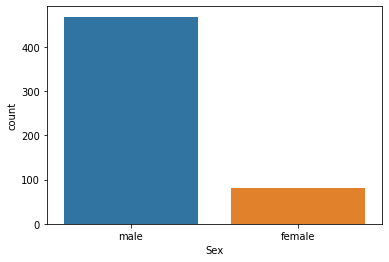

In [34]:
import seaborn as sns

sns.countplot(df[df['Survived']==0]['Sex'])

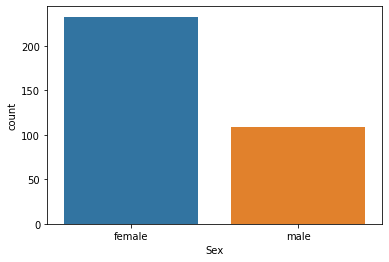

In [35]:
sns.countplot(df[df['Survived']==1]['Sex'])

In [36]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [37]:
df= pd.get_dummies(df,drop_first=True)


In [38]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Title,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,10,0,0,0
2,1,3,26.0,0,0,7.9250,10,0,0,1
3,1,1,35.0,1,0,53.1000,10,0,0,1
4,0,3,35.0,0,0,8.0500,0,1,0,1


In [39]:
X = df.drop(["Survived"],axis=1).values
y = df['Survived'].values

In [40]:
X.shape

(891, 9)

In [41]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 5)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [43]:
accuracy = []
k_value = []
max_k = accuracy
for i in range(3,100,2):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accu = accuracy_score(y_test,y_pred)
    if (accu >= accuracy).all():
        max_k = i
    accuracy.append(accu)
    k_value.append(i)

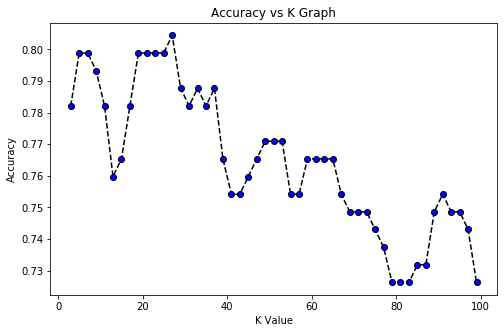

In [44]:
### Graph b/w accu and K
plt.figure(figsize=(8,5))
plt.title("Accuracy vs K Graph")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
plt.plot(k_value,accuracy,color='black',linestyle='dashed',marker='o',markerfacecolor='blue')
plt.show()

In [45]:
print("The Maximum Accuracy is : " + str(max(accuracy)))
print("The Value of K at the accuracy of {} is {}".format(max(accuracy),max_k))

The Maximum Accuracy is : 0.8044692737430168
The Value of K at the accuracy of 0.8044692737430168 is 27


In [46]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(X_train,y_train)
y_pred1 = model.predict(X_test)
accuracy_score(y_test,y_pred1)

0.8603351955307262

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred1)
cm

array([[108,  10],
       [ 15,  46]])